In [2]:
import json, time, urllib.parse
import pandas as pd
import requests

In [8]:
#########
#
#    CONSTANTS
#

# The REST API 'pageviews' URL - this is the common URL/endpoint for all 'pageviews' API requests
API_REQUEST_PAGEVIEWS_ENDPOINT = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'

# This is a parameterized string that specifies what kind of pageviews request we are going to make
# In this case it will be a 'per-article' based request. The string is a format string so that we can
# replace each parameter with an appropriate value before making the request
API_REQUEST_PER_ARTICLE_PARAMS = 'per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'

# The Pageviews API asks that we not exceed 100 requests per second, we add a small delay to each request
API_LATENCY_ASSUMED = 0.002       # Assuming roughly 2ms latency on the API and network
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED

# When making a request to the Wikimedia API they ask that you include your email address which will allow them
# to contact you if something happens - such as - your code exceeding rate limits - or some other error 
REQUEST_HEADERS = {
    'User-Agent': 'asheera@uw.edu, University of Washington, MSDS DATA 512 - AUTUMN 2023',
}

# This is just a list of English Wikipedia article titles that we can use for example requests
ARTICLE_TITLES = [ 'Klinefelter syndrome', 'Zinc deficiency', 'Red squirrel', 'Chinook salmon', 'Horseshoe bat' ]

# This template is used to map parameter values into the API_REQUST_PER_ARTICLE_PARAMS portion of an API request. The dictionary has a
# field/key for each of the required parameters. In the example, below, we only vary the article name, so the majority of the fields
# can stay constant for each request. Of course, these values *could* be changed if necessary.
ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "mobile-web",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015070100",   # start and end dates need to be set
    "end":         "2024093000"    # this is likely the wrong end date
}


In [9]:
#########
#
#    PROCEDURES/FUNCTIONS
#

def request_pageviews_per_article(article_title = None, 
                                  endpoint_url = API_REQUEST_PAGEVIEWS_ENDPOINT, 
                                  endpoint_params = API_REQUEST_PER_ARTICLE_PARAMS, 
                                  request_template = ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE,
                                  headers = REQUEST_HEADERS):

    # article title can be as a parameter to the call or in the request_template
    if article_title:
        request_template['article'] = article_title

    if not request_template['article']:
        raise Exception("Must supply an article title to make a pageviews request.")

    # Titles are supposed to have spaces replaced with "_" and be URL encoded
    article_title_encoded = urllib.parse.quote(request_template['article'].replace(' ','_'))
    request_template['article'] = article_title_encoded
    
    # now, create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url+endpoint_params.format(**request_template)
    
    # make the request
    try:
        # we'll wait first, to make sure we don't exceed the limit in the situation where an exception
        # occurs during the request processing - throttling is always a good practice with a free
        # data source like Wikipedia - or other community sources
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response


In [10]:
print("Getting pageview data for: ",ARTICLE_TITLES[0])
views = request_pageviews_per_article(ARTICLE_TITLES[0])

Getting pageview data for:  Klinefelter syndrome


In [11]:
#print(json.dumps(views,indent=4))
print(f"Collected {len(views['items'])} months of pageview data")
for month in views['items']:
    print(json.dumps(month,indent=4))

Collected 111 months of pageview data
{
    "project": "en.wikipedia",
    "article": "Klinefelter_syndrome",
    "granularity": "monthly",
    "timestamp": "2015070100",
    "access": "mobile-web",
    "agent": "user",
    "views": 37587
}
{
    "project": "en.wikipedia",
    "article": "Klinefelter_syndrome",
    "granularity": "monthly",
    "timestamp": "2015080100",
    "access": "mobile-web",
    "agent": "user",
    "views": 34022
}
{
    "project": "en.wikipedia",
    "article": "Klinefelter_syndrome",
    "granularity": "monthly",
    "timestamp": "2015090100",
    "access": "mobile-web",
    "agent": "user",
    "views": 32844
}
{
    "project": "en.wikipedia",
    "article": "Klinefelter_syndrome",
    "granularity": "monthly",
    "timestamp": "2015100100",
    "access": "mobile-web",
    "agent": "user",
    "views": 35167
}
{
    "project": "en.wikipedia",
    "article": "Klinefelter_syndrome",
    "granularity": "monthly",
    "timestamp": "2015110100",
    "access": "mo

In [12]:
views

{'items': [{'project': 'en.wikipedia',
   'article': 'Klinefelter_syndrome',
   'granularity': 'monthly',
   'timestamp': '2015070100',
   'access': 'mobile-web',
   'agent': 'user',
   'views': 37587},
  {'project': 'en.wikipedia',
   'article': 'Klinefelter_syndrome',
   'granularity': 'monthly',
   'timestamp': '2015080100',
   'access': 'mobile-web',
   'agent': 'user',
   'views': 34022},
  {'project': 'en.wikipedia',
   'article': 'Klinefelter_syndrome',
   'granularity': 'monthly',
   'timestamp': '2015090100',
   'access': 'mobile-web',
   'agent': 'user',
   'views': 32844},
  {'project': 'en.wikipedia',
   'article': 'Klinefelter_syndrome',
   'granularity': 'monthly',
   'timestamp': '2015100100',
   'access': 'mobile-web',
   'agent': 'user',
   'views': 35167},
  {'project': 'en.wikipedia',
   'article': 'Klinefelter_syndrome',
   'granularity': 'monthly',
   'timestamp': '2015110100',
   'access': 'mobile-web',
   'agent': 'user',
   'views': 39124},
  {'project': 'en.wik

In [ ]:
ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "mobile-web",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015070100",   # start and end dates need to be set
    "end":         "2024093000"    # this is likely the wrong end date
}

# Load disease names from CSV file
csv_file_path = 'rare-disease_cleaned.AUG.2024.csv'  # Path to your CSV file
df_diseases = pd.read_csv(csv_file_path)

# Extract the disease column
disease_titles = df_diseases['disease'].tolist()

# Create an empty DataFrame to store the pageview data
columns = ['disease', 'month', 'views']
df_pageviews = pd.DataFrame(columns=columns)

# Loop through each disease title and request pageviews data
for disease in disease_titles:
    print(f"Fetching pageview data for: {disease}")
    pageviews = request_pageviews_per_article(disease, request_template = ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE)
    pageviews = pageviews.get('items', [])
    
    # Process each month's data and append it to the DataFrame
    for data in pageviews:
        df_pageviews = df_pageviews.append({
            'disease': disease,
            'month': data['timestamp'],
            'views': data['views']
        }, ignore_index=True)

# Save the DataFrame to a JSON file
df_pageviews.to_json(f'rare-disease_monthly_mobile-web_201507-202409.json',
                    orient='records',
                    lines=True)

print("Pageview data collection complete!")

In [15]:
ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "mobile-app",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015070100",   # start and end dates need to be set
    "end":         "2024093000"    # this is likely the wrong end date
}

# Load disease names from CSV file
csv_file_path = 'rare-disease_cleaned.AUG.2024.csv'  # Path to your CSV file
df_diseases = pd.read_csv(csv_file_path)

# Extract the disease column
disease_titles = df_diseases['disease'].tolist()

# Create an empty DataFrame to store the pageview data
columns = ['disease', 'month', 'views']
df_pageviews = pd.DataFrame(columns=columns)

# Loop through each disease title and request pageviews data
for disease in disease_titles:
    print(f"Fetching pageview data for: {disease}")
    pageviews = request_pageviews_per_article(disease, request_template = ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE)
    pageviews = pageviews.get('items', [])
    
    # Process each month's data and create a DataFrame
    temp_df = pd.DataFrame([{
        'disease': disease,
        'month': data['timestamp'],
        'views': data['views']
    } for data in pageviews])

    # Concatenate the new data with the existing DataFrame
    df_pageviews = pd.concat([df_pageviews, temp_df], ignore_index=True)

# Save the DataFrame to a JSON file
df_pageviews.to_json(f'rare-disease_monthly_mobile-app_201507-202409.json',
                    orient='records',
                    lines=True)

print("Pageview data collection complete!")

Fetching pageview data for: Klinefelter syndrome
Fetching pageview data for: Aarskog–Scott syndrome
Fetching pageview data for: Abetalipoproteinemia
Fetching pageview data for: MT-TP
Fetching pageview data for: Ablepharon macrostomia syndrome
Fetching pageview data for: Acanthocheilonemiasis
Fetching pageview data for: Acanthosis nigricans
Fetching pageview data for: Aceruloplasminemia
Fetching pageview data for: Megaesophagus
Fetching pageview data for: Achard–Thiers syndrome
Fetching pageview data for: Achondrogenesis
Fetching pageview data for: Achondroplasia
Fetching pageview data for: Dwarfism
Fetching pageview data for: Osteochondrodysplasia
Fetching pageview data for: Fibroblast growth factor receptor 3
Fetching pageview data for: Vestibular schwannoma
Fetching pageview data for: Brain tumor
Fetching pageview data for: Acquired generalized lipodystrophy
Fetching pageview data for: Barraquer–Simons syndrome
Fetching pageview data for: Acrodermatitis enteropathica
Fetching pagevie

In [26]:
# Load the mobile-app and mobile-web JSON files
mobile_app_views_path = 'rare-disease_monthly_mobile-app_201507-202409.json'
mobile_web_views_path = 'rare-disease_monthly_mobile-web_201507-202409.json'

df_mobile_app = pd.read_json(mobile_app_views_path, lines=True)
df_mobile_web = pd.read_json(mobile_web_views_path, lines=True)

# Merge the dataframes on 'disease' and 'month' columns
df_combined_mobile = pd.merge(df_mobile_app, df_mobile_web, on=['disease', 'month'], suffixes=('_app', '_web'))

# Create a new column for total mobile views
df_combined_mobile['views'] = df_combined_mobile['views_app'] + df_combined_mobile['views_web']

# Select the desired columns to save
df_total_mobile_views = df_combined_mobile[['disease', 'month', 'views']]

# Save the combined data to a new JSON file
df_total_mobile_views.to_json('rare-disease_monthly_mobile_201507-202409.json',
                              orient='records', lines=True)

print("Total mobile views data collection complete!")


Total mobile views data collection complete!


In [29]:
# Load the mobile-app and mobile-web JSON files
mobile_views_path = 'rare-disease_monthly_mobile_201507-202409.json'
desktop_views_path = 'rare-disease_monthly_desktop_201507-202409.json'

df_mobile = pd.read_json(mobile_views_path, lines=True)
df_desktop = pd.read_json(desktop_views_path, lines=True)

# Merge the dataframes on 'disease' and 'month' columns
df_combined = pd.merge(df_mobile, df_desktop, on=['disease', 'month'], suffixes=('_mobile', '_desktop'))

# Create a new column for total mobile views
df_combined['views'] = df_combined['views_mobile'] + df_combined['views_desktop']

# Select the desired columns to save
df_total_views = df_combined[['disease', 'month', 'views']]

# Save the combined data to a new JSON file
df_total_views.to_json('rare-disease_monthly_cumulative_201507-202409.json',
                              orient='records', lines=True)

print("Total views data collection complete!")

Total views data collection complete!


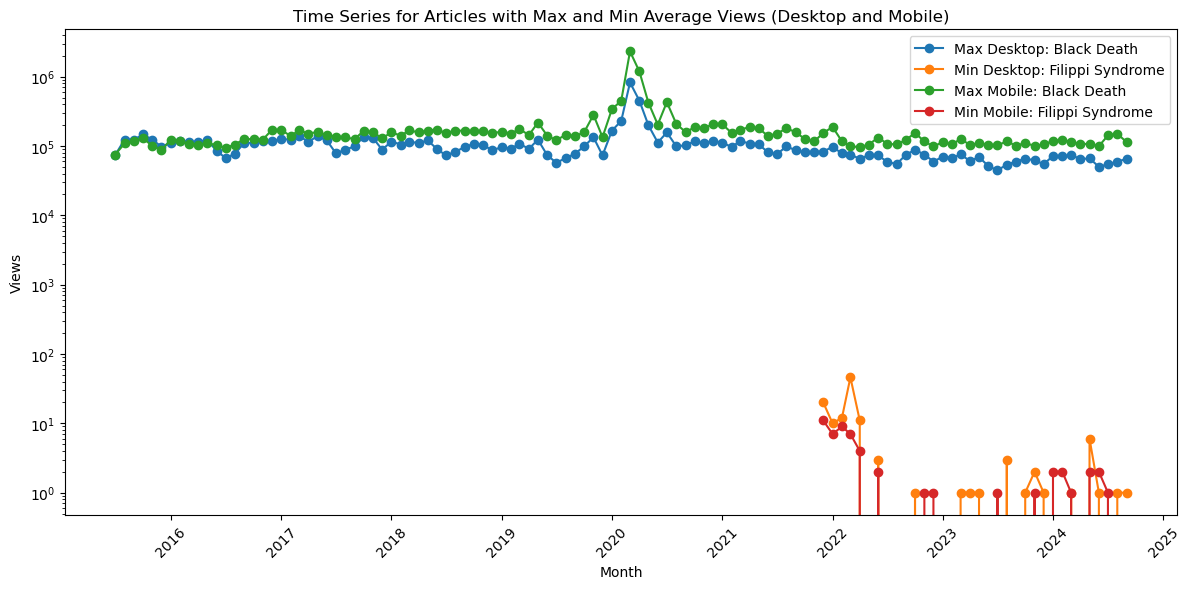

In [39]:
"""
Analysis I

* Maximum Average and Minimum Average - The first graph contains time
series for the articles that have the highest average page requests and 
the lowest average page requests for desktop access and mobile access over 
the entire time series. The graph has four lines (max desktop, min desktop, 
max mobile, min mobile).

"""
import pandas as pd
import matplotlib.pyplot as plt


# Load desktop and mobile dataframes
df_desktop = pd.read_json('rare-disease_monthly_desktop_201507-202409.json',lines=True)
df_mobile = pd.read_json('rare-disease_monthly_mobile_201507-202409.json',lines=True)

# Calculate average views per disease for desktop and mobile
avg_views_desktop = df_desktop.groupby('disease')['views'].mean()
avg_views_mobile = df_mobile.groupby('disease')['views'].mean()

# Find disease with maximum and minimum average views for desktop and mobile
max_avg_desktop_disease = avg_views_desktop.idxmax()
min_avg_desktop_disease = avg_views_desktop.idxmin()
max_avg_mobile_disease = avg_views_mobile.idxmax()
min_avg_mobile_disease = avg_views_mobile.idxmin()

# Filter the time series for the selected diseases in both dataframes
max_desktop_series = df_desktop[df_desktop['disease'] == max_avg_desktop_disease]
min_desktop_series = df_desktop[df_desktop['disease'] == min_avg_desktop_disease]

max_mobile_series = df_mobile[df_mobile['disease'] == max_avg_mobile_disease]
min_mobile_series = df_mobile[df_mobile['disease'] == min_avg_mobile_disease]

# Create copies before modifying the dataframae
max_desktop_series = max_desktop_series.copy()
min_desktop_series = min_desktop_series.copy()
max_mobile_series = max_mobile_series.copy()
min_mobile_series = min_mobile_series.copy()

# Convert month column to datetime for better plotting
max_desktop_series['month'] = pd.to_datetime(max_desktop_series['month'], format='%Y%m%d%H')
min_desktop_series['month'] = pd.to_datetime(min_desktop_series['month'], format='%Y%m%d%H')
max_mobile_series['month'] = pd.to_datetime(max_mobile_series['month'], format='%Y%m%d%H')
min_mobile_series['month'] = pd.to_datetime(min_mobile_series['month'], format='%Y%m%d%H')

# Plot the time series data
plt.figure(figsize=(12, 6))

plt.plot(max_desktop_series['month'], max_desktop_series['views'], label=f'Max Desktop: {max_avg_desktop_disease}', linestyle='-', marker='o')
plt.plot(min_desktop_series['month'], min_desktop_series['views'], label=f'Min Desktop: {min_avg_desktop_disease}', linestyle='-', marker='o')

plt.plot(max_mobile_series['month'], max_mobile_series['views'], label=f'Max Mobile: {max_avg_mobile_disease}', linestyle='-', marker='o')
plt.plot(min_mobile_series['month'], min_mobile_series['views'], label=f'Min Mobile: {min_avg_mobile_disease}', linestyle='-', marker='o')

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Views')
plt.title('Time Series for Articles with Max and Min Average Views (Desktop and Mobile)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.yscale('log')

# Show the plot
plt.show()

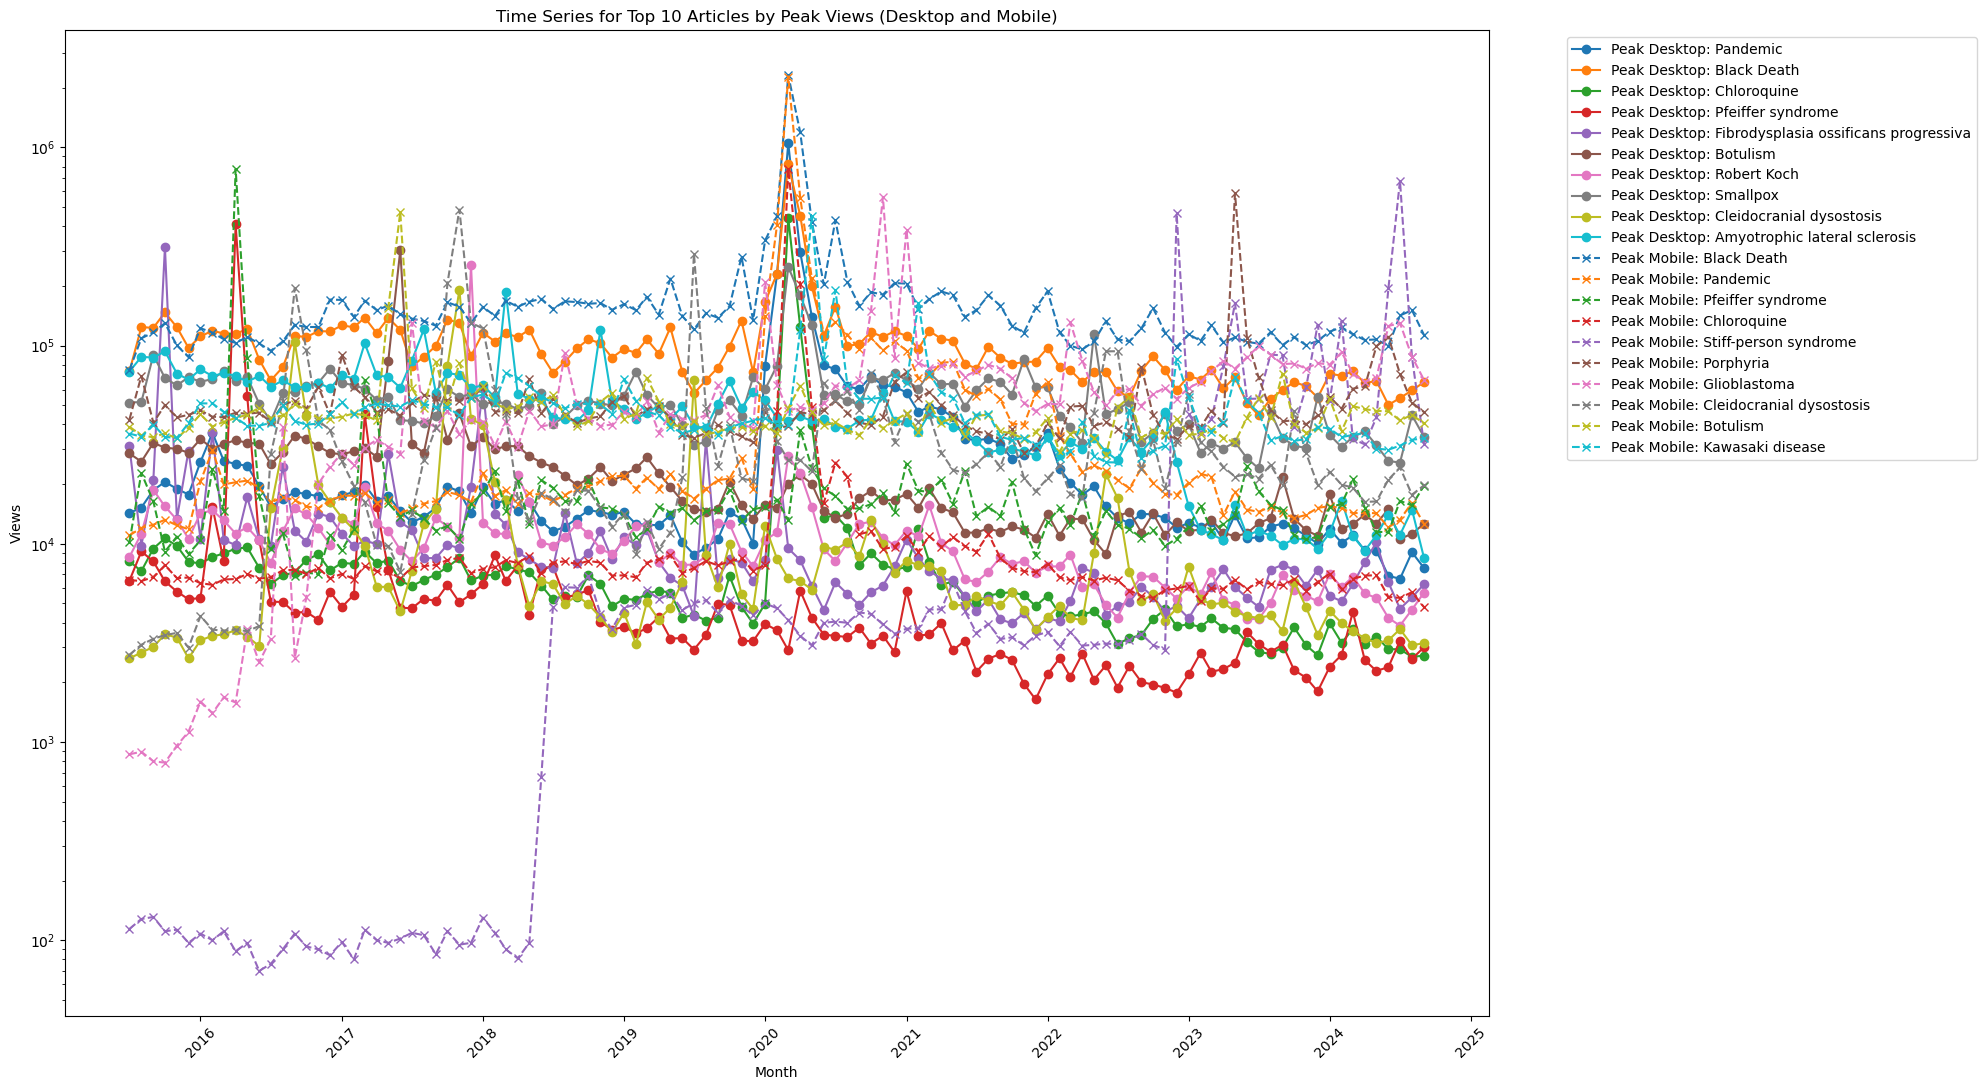

In [53]:
"""
Analysis II

* Top 10 Peak Page Views - The second graph contains time series for
the top 10 article pages by largest (peak) page views over the entire time 
series by access type. You first find the month for each article that contains 
the highest (peak) page views, and then order the articles by these peak values. 
Your graph should contain the top 10 for desktop and top 10 for mobile access 
(20 lines).

"""

# Calculate peak views per disease for desktop and mobile
peak_views_desktop = df_desktop.groupby('disease')['views'].max().sort_values(ascending=False).head(10)
peak_views_mobile = df_mobile.groupby('disease')['views'].max().sort_values(ascending=False).head(10)

# Create copies before modifying the dataframae
peak_views_desktop_series = df_desktop[df_desktop['disease'].isin(peak_views_desktop.index)].copy()
peak_views_mobile_series = df_mobile[df_mobile['disease'].isin(peak_views_mobile.index)].copy()

# Convert month column to datetime for better plotting
peak_views_desktop_series['month'] = pd.to_datetime(peak_views_desktop_series['month'], format='%Y%m%d%H')
peak_views_mobile_series['month'] = pd.to_datetime(peak_views_mobile_series['month'], format='%Y%m%d%H')

# Plot the time series data
plt.figure(figsize=(20,11))

# Plot each disease in the top 10 for desktop views
for disease in peak_views_desktop.index:
    disease_series = peak_views_desktop_series[peak_views_desktop_series['disease'] == disease]
    plt.plot(disease_series['month'], disease_series['views'], label=f'Peak Desktop: {disease}', linestyle='-', marker='o')

# Plot each disease in the top 10 for mobile views
for disease in peak_views_mobile.index:
    disease_series = peak_views_mobile_series[peak_views_mobile_series['disease'] == disease]
    plt.plot(disease_series['month'], disease_series['views'], label=f'Peak Mobile: {disease}', linestyle='--', marker='x')

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Views')
plt.title('Time Series for Top 10 Articles by Peak Views (Desktop and Mobile)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.yscale('log')

# Show the plot
plt.show()


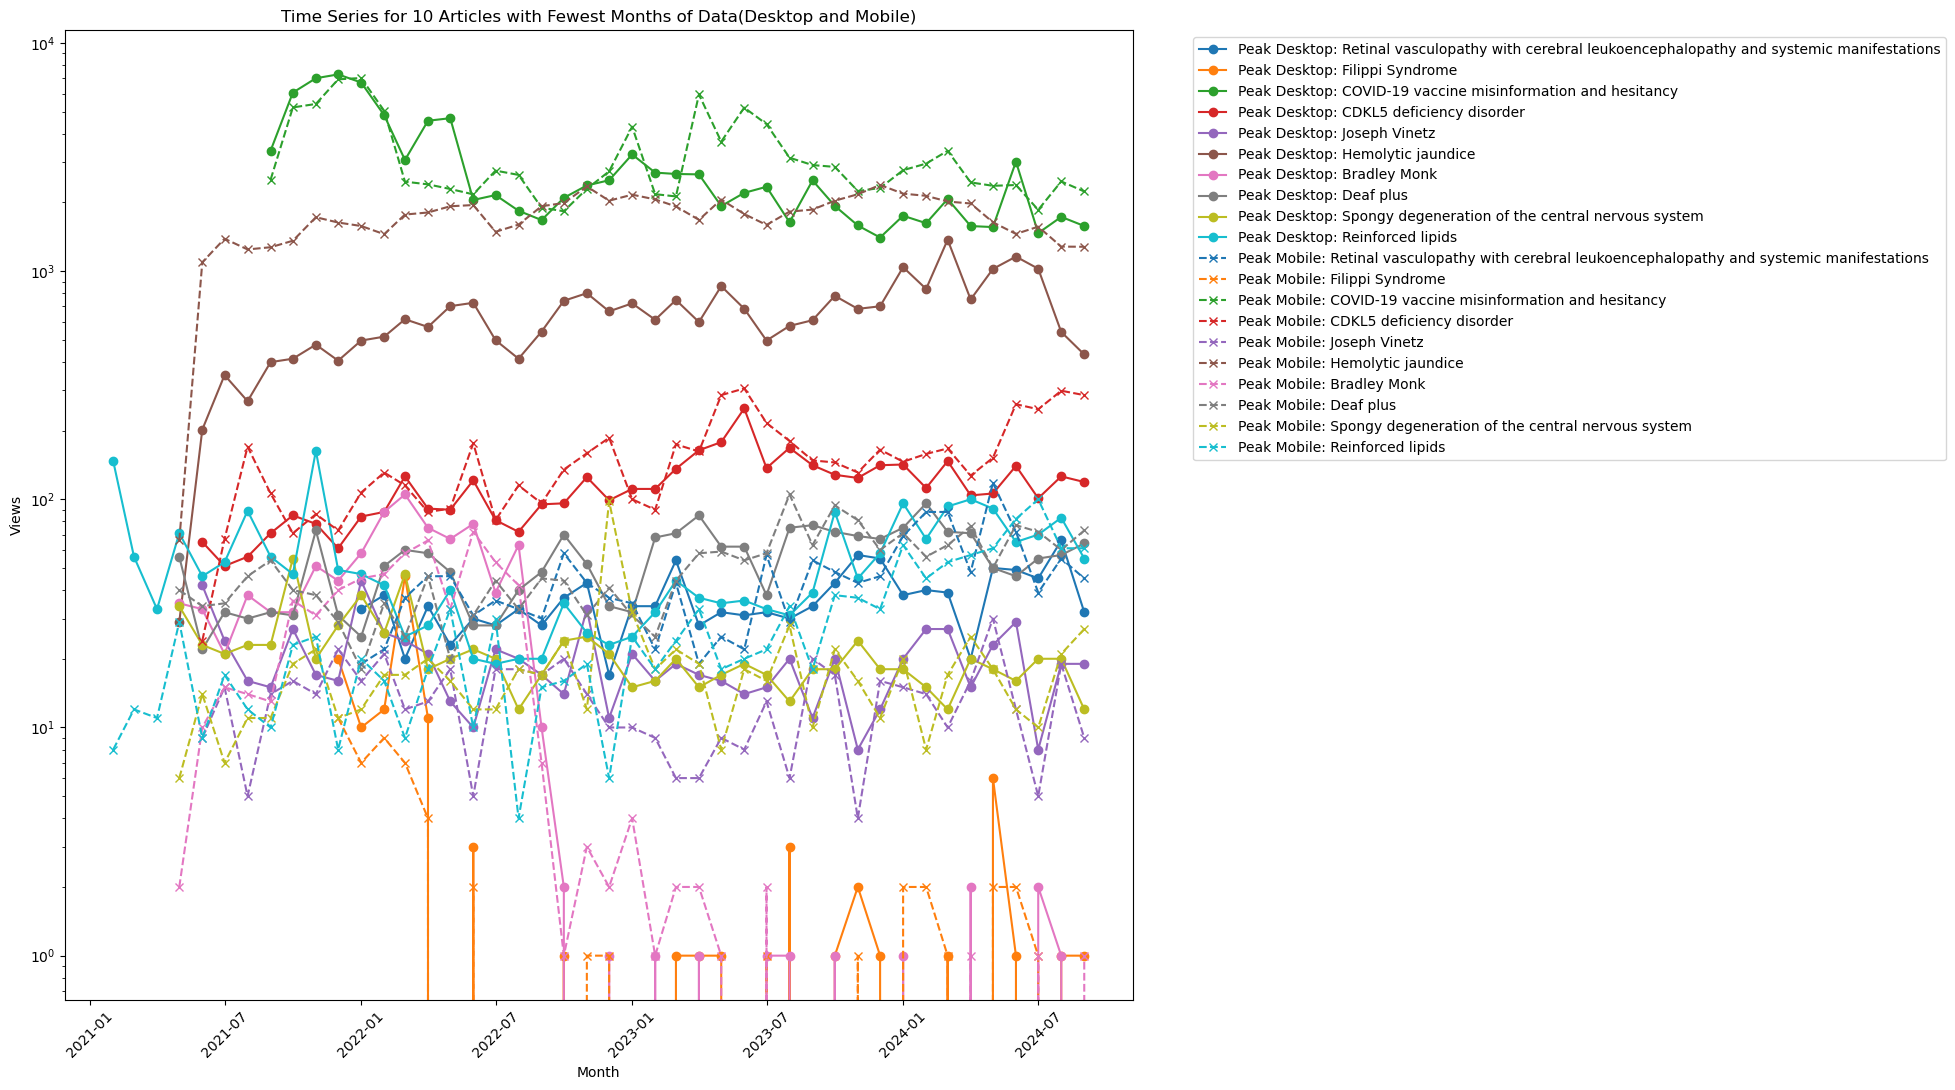

In [55]:
"""
Analysis III

* Fewest Months of Data - The third graph should show pages that have the 
fewest months of available data. These will likely be relatively short time 
series, some may only have one month of data. Your graph should show the 
10 articles with the fewest months of data for desktop access and the 10 articles 
with the fewest months of data for mobile access.

"""

# Calculate peak views per disease for desktop and mobile
fewest_entries_desktop = df_desktop.groupby('disease')['views'].count().sort_values(ascending=True).head(10)
fewest_entries_mobile = df_mobile.groupby('disease')['views'].count().sort_values(ascending=True).head(10)

# Create copies before modifying the dataframae
fewest_entries_desktop_series = df_desktop[df_desktop['disease'].isin(fewest_entries_desktop.index)].copy()
fewest_entries_mobile_series = df_mobile[df_mobile['disease'].isin(fewest_entries_mobile.index)].copy()

# Convert month column to datetime for better plotting
fewest_entries_desktop_series['month'] = pd.to_datetime(fewest_entries_desktop_series['month'], format='%Y%m%d%H')
fewest_entries_mobile_series['month'] = pd.to_datetime(fewest_entries_mobile_series['month'], format='%Y%m%d%H')

# Plot the time series data
plt.figure(figsize=(20,11))

# Plot each disease in the top 10 for desktop views
for disease in fewest_entries_desktop.index:
    disease_series = fewest_entries_desktop_series[fewest_entries_desktop_series['disease'] == disease]
    plt.plot(disease_series['month'], disease_series['views'], label=f'Peak Desktop: {disease}', linestyle='-', marker='o')

# Plot each disease in the top 10 for mobile views
for disease in fewest_entries_mobile.index:
    disease_series = fewest_entries_mobile_series[fewest_entries_mobile_series['disease'] == disease]
    plt.plot(disease_series['month'], disease_series['views'], label=f'Peak Mobile: {disease}', linestyle='--', marker='x')

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Views')
plt.title('Time Series for 10 Articles with Fewest Months of Data(Desktop and Mobile)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.yscale('log')

# Show the plot
plt.show()